In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Itano experiment

Quantum Zeno effect <br>
Wayne M. Itano, D. J. Heinzen, J. J. Bollinger, and D. J. Wineland <br>
Phys. Rev. A 41, 2295 – Published 1 March 1990 <br>
https://journals.aps.org/pra/abstract/10.1103/PhysRevA.41.2295

First, coherent Rabi. In rotating frame, the H is only sigmax:

https://physics.stackexchange.com/questions/471782/spin-precession-for-rabi-oscillations-interpretation-with-magnetic-field-in-ro

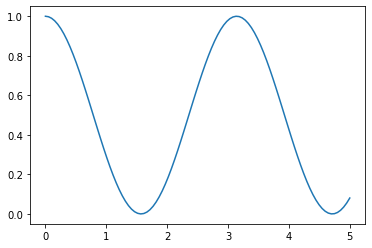

In [2]:
N = 2
wr = 1

H = wr*sigmax()
psi0 = basis(N,0)

t = np.linspace(0,5,100)
result = sesolve(H,psi0,t)

P1 = expect(projection(2,0,0), result.states)
plt.plot(t,P1)

Now add measurement of if you are in "up". This is a sigmaz collapse operator. 

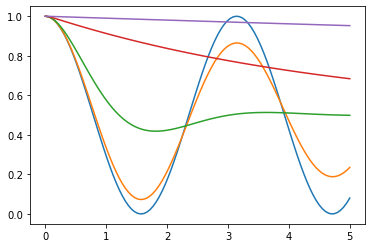

In [6]:
N = 2
wr = 1

H = wr*sigmax()
psi0 = basis(N,0)

t = np.linspace(0,5,100)
P1op = projection(2,0,0)

def plot_gamma(gamma):
    result = mesolve(H,psi0,t, np.sqrt(gamma)*sigmaz())
    P1 = expect(P1op, result.states)
    plt.plot(t,P1, label="gamma = %.1f" % gamma)
    
plot_gamma(0)
plot_gamma(0.1)
plot_gamma(1)
plot_gamma(10)
plot_gamma(100)

OK, so Nobel-prize winning physicists are often right, this works :)

What is the interpretation here? It is basically collapse noise in the z-direction keeping the spin pointing up. 

It's probably interesting to look at quantum trajectories for this. 

10.0%. Run time:   0.20s. Est. time left: 00:00:00:01
20.0%. Run time:   0.34s. Est. time left: 00:00:00:01
30.0%. Run time:   0.48s. Est. time left: 00:00:00:01
40.0%. Run time:   0.57s. Est. time left: 00:00:00:00
50.0%. Run time:   0.66s. Est. time left: 00:00:00:00
60.0%. Run time:   0.77s. Est. time left: 00:00:00:00
70.0%. Run time:   0.86s. Est. time left: 00:00:00:00
80.0%. Run time:   0.98s. Est. time left: 00:00:00:00
90.0%. Run time:   1.08s. Est. time left: 00:00:00:00
100.0%. Run time:   1.18s. Est. time left: 00:00:00:00
Total run time:   1.24s


(-0.05, 1.05)

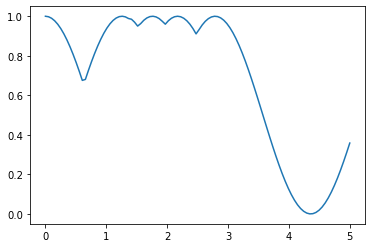

In [9]:
N = 2
wr = 1

H = wr*sigmax()
psi0 = basis(N,0)

t = np.linspace(0,5,100)

gamma = 1

result = mcsolve(H,psi0,t, np.sqrt(gamma)*sigmaz())

i=0
state = result.states[i,:]
plt.plot(t,expect(P1op, state))
plt.ylim(-0.05,1.05)

OK, I don't get it: why does a sigma_z collapse operator not collapse onto an eigenstate of sigmaz? 

10.0%. Run time:   0.36s. Est. time left: 00:00:00:03
20.0%. Run time:   0.71s. Est. time left: 00:00:00:02
30.0%. Run time:   0.98s. Est. time left: 00:00:00:02
40.0%. Run time:   1.31s. Est. time left: 00:00:00:01
50.0%. Run time:   1.63s. Est. time left: 00:00:00:01
60.0%. Run time:   1.93s. Est. time left: 00:00:00:01
70.0%. Run time:   2.28s. Est. time left: 00:00:00:00
80.0%. Run time:   2.61s. Est. time left: 00:00:00:00
90.0%. Run time:   2.91s. Est. time left: 00:00:00:00
100.0%. Run time:   3.22s. Est. time left: 00:00:00:00
Total run time:   3.28s


(-0.05, 1.05)

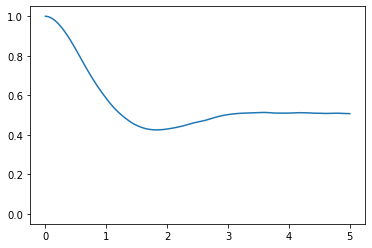

In [8]:
gamma = 1
result = mcsolve(H,psi0,t, np.sqrt(gamma)*sigmaz(), P1op, ntraj=1000)
plt.plot(t,result.expect[0])
plt.ylim(-0.05,1.05)

It does converge to the (correct?) result though. 

# Now try decay

Basically, now we take H = 0 and add a sigma minus collapse operator with a fixed rate. Start with just decay. 

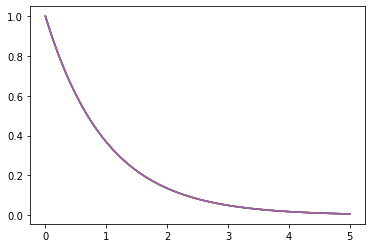

In [60]:
N = 2
wr = 0

H = wr*sigmax()
psi0 = basis(N,0)

t = np.linspace(0,5,100)

gamma_decay = 1

def plot_gamma(gamma):
    c_ops = [gamma_decay**0.5*sigmam(), gamma**0.5*sigmaz()]
    result = mesolve(H,psi0,t, c_ops)
    P1 = expect(projection(2,0,0), result.states)
    plt.plot(t,P1, label="gamma = %.1f" % gamma)
    
plot_gamma(0)
plot_gamma(0.1)
plot_gamma(1)
plot_gamma(10)
plot_gamma(100)

Ha! While you can stop coherent evolution by measurement, you cannot stop decay!

At least not in the Markov approximation :) If you allow for non-zero correlations with the bath you are decaying too, then maybe yes. This is basically what my term paper was talking about:

https://zenodo.org/record/5732307#.Yar2-vHMI-R

But for that, we cannot simply use the Lindblad equation since it is based on the assumption of no correlations with the bath, which breaks down in the short time approximation that I discussed in the term paper. 

But, as I discussed in that paper, this perhaps a non-experimentally-accessible regime. Basically, it is the regime of non-markovian quantum dynamics of an open (well implicitly not...) system. 